# L7 Computer vision group project
## L7 CV Group - 2
### Ben Snow
### Nick Lindfield

# Depth prediction using video game data for real-world applications.

# Definition of the problem
With the rise of autonomous vehicles, on-camera image processing and augmented reality (AR), there is an increasing need for accurate depth prediction
Current methods produce highly noisy results and lack detail, frequently failing to separate background and foreground objects. [14]


![image cannot be found](depth_comparison.png "Depth comaprison")
Figure 1. A comaprison of predicted and ground truth depth predictions from various neural network depth prediction algorithms.

Current uses for depth prediction/estimation are:
- Autonomous driving - predicting the distance of objects on the road, such as other motorists, pedestrians and cyclists.
- Image processing - blurring foreground subject from the background.
- AR - object occlusion, placing digital characters behind objects such as tables.


With this project, we aim to overcome the difficulties of collecting real-world data by using augmented data from video games, we will extract the depth buffer and RGB values to be used as our training data.


Some advantages and disadvantages of real-world and augmented data are:


Disadvantages of real-world data
- DIS - Expensive -transporting the equipment and staff to the location 
- DIS - Requires specialized equipment
- DIS - Weather condition can affect the accuracy of the data


Advantage of video game data
- ADV - Cheap and easy to come by
- ADV - A larger amount of data can be collected
- ADV - Control of lighting and weather conditions 
- ADV - Accurate depth in poor weather conditions easily
- ADV - Can create edge cases but these don’t happen naturally
- ADV - No transportation and logistical costs -- Saves the environment
- ADV - Procedural generation of datasets


Disadvantages of video game data


- DIS - May not be an accurate estimation of the real world
- DIS - Overfitting to similar environments
- DIS - Our data may be too perfect, real-world data can contain noise and other artefacts


To analyse our results we will test them against real-world datasets, such as DrivingStereo, KITTI.
We intend to build upon existing papers that obtain depth data from video games.  Existing solutions exist but they are not open source and freely available.


## Depth detection and video games
Advancement of the realistic nature of Computer-Generated (CG) environments could become the basis for training artificial agents. Instead of spending time driving around physical cars in the real world to collect data, a CG environment could be created to simulate the same data. Advantages of CG environments over real-world environments could be that data is much faster to produce, AI’s could learn faster and edge cases (broken down vehicles, towing caravans etc…) could be easily inserted into the simulation at will instead of waiting for them to happen in real life. Transfer learning could be exploited to utilise the training performed in the CG environment to the real-world.

Existing techniques are beginning to be used for training self-driving cars this way. Nvidia have created a virtual training environment for training driverless cars for Toyota called Nvidia Constellation. This system allows for the training, testing and evaluation of driverless AI in many thousands of different scenarios allowing for billions of miles of training before hitting the road.

Edge case simulations can easily be inserted into the CG environment. Existing scenes from previous CG projects and games can be directly used and included in the training set. This will be advantageous for the AI’s learning capabilities as exposure to as many scenarios as possible generates experience for real-world events. Taken further, simulations of natural disasters, traffic jams, piles ups and crashes can all be generated in CG without any real-world danger! Fully autonomous vehicles should be equipped with the experience to tackle these edge cases, should they need to deal with them.

Modern video game engines are capable of creating incredibly complex scene topologies in real time with physically based movements and interactions. An example of this being Grand Theft Auto 5 in which players are free to roam in a realistic rendering of a city, San Andreas, based on Los Angeles. Players can drive a multitude of cars, motorcycles and aircraft around the city on numerous roads and paths. This environment could be an ideal playground for building and training autonomous vehicles for use in the real world. One example of this is in a youtube series by user ‘Sentdex’ who attempted to use a Deep Convolutional Network based on AlexNet to drive on the streets of San Andreas. The model is available on github for download.

In a video game, depth field training data can be extracted directly from the video game engine and is called a z-buffer.

Existing techniques are available for constructing a depth map from a single frame and from binocular stereo frames. The referenced single frame method employs traditional computer vision techniques whereas the stereo method uses a CNN architecture.


#  Aims and objectives
We aim to generate a dataset consisting of RGB and Depth channels in a wide range of environments and weather conditions.
We aim to create and evaluate depth estimation algorithms, utilising PyTorch, OpenCV and a combination of traditional computer vision methods, finally evaluating our results on a range of testing datasets.
The following measurable objectives have been identified:
- Generate a synthetic image and depth dataset from the video game GTA V
- Use data augmentation techniques to increase the amount of data
- Use a driving bot and mods to autonomously collect data in different weather conditions and environments
- Create a traditional (OpenCV) depth prediction algorithm
- Create a neural network only depth prediction algorithm
- Create a depth prediction algorithm neural network trained on data augmented with OpenCV techniques
- Evaluate the depth prediction model on various real-world and virtual testing datasets including the accepted standard KITTI dataset and a new, more varied dataset, DrivingStereo (Feb 2020).
- Compare our model to the model found in our references below, as they have already trained a model on a narrow video game dataset.


# Data acquisition and preparation

## GTA V

GTA V is a closed source video game meaning that there is no direct access to the source code available. As a result, the GTA V modding community has found multiple different ways of accessing parts of the rendering pipeline. These methods typically rely on injecting a 'DirectX11 driver' into the game before frame drawing time to intercept data used in the rendering stage. It is here that the depth information is stored.
Data collection was split into 3 parts at the beginning of the project and are defined below.

Simple collection
- Extract order 10 RGB and depth image pairs from GTAV
- Drive around in one environment with constant weather conditions, no occlusions and no data augmentation
- Data collected so that initial models have data to work with

Moderate collection
- Use a bot to automatically drive around and drastically increase the dataset size
- Use GTA mods to alter the weather conditions and times of day
- Drive around new locations such as city and off-road
- Store data in a more organised fashion with better naming conventions and foldering
- Implement low-level data augmentation such as translations and reflections

Hard collection
- Better data augmentation
- Add in varied occlusions and domain adaptation
- Image style transfer from real-world data to synthetic data


## Simple collection

A repository called [GTAVisionExport](https://github.com/umautobots/GTAVisionExport) was used as a starting point to extract single frames of Colour, Depth and Stencil Depth from GTAV. Saved files are stored as .raw images and, as such, cannot be directly imported into python natively. The section 'Image formats' discusses this further.

Extraction code within the GTAVisionExport was altered to the following to extract the depth, RGB/colour image and stencil (not used) images. If the 'L' key is pressed, the depth, stencil and color buffers are written to the game file directory.

![image cannot be found](Simple_collection_cpp.png "Extraction code")
Figure 2: Extraction code written in C++ to output RGB, Depth and stencil depth images from GTAV.


GTAVisionExport gives all saved images the same filenames (color.raw, depth.raw and stencil.raw). Taking multiple screenshots overwrites the currently saved files. Moving these files out of the game directory then taking another screenshot allows multiple different screenshots to be saved. This is cumbersome and annoying. As such, the GTAVisionExport source code will be changed so that new files are saved with a timestamp and to a new folder for easy, more organised storage.

A full description of how to install GTAVisionExport can be seen in the [group google document here.](https://docs.google.com/document/d/1UcQl8Q-COs9_vZ65RKXD8DnIcmRnXzqsJBdfcmd6iJY/edit?usp=sharing)


As ‘Simple collection’ only requires on the order of 10 colour and depth images, the manual moving and renaming files technique was be used.

Example image outputs from Simple collection can be seen below:

![image cannot be found](sample_simple_rgb.png "Simple RGB")
Figure 3. Example of a colour screenshot extracted from in-game.

![image cannot be found](sample_depth_rgb.png "Simple depth")
Figure 4. Depth information is shown with colour gradients, the more yellow/red the item the closer it is and vice versa for blue and purple.

### Image formats

Images extracted from GTAV are stored as .raw files and as such, two functions, `import_raw_colour_image` and `import_raw_depth_image` were written to load the images into numpy arrays.

The shape of colour images are: 	 (720, 1280, 4)

And for depth images they are: 	     (720, 1280)
 
Colour images are read in as 'unit8' with 4 channels, RGBA
This means that for every one of the 720*1280 pixels there are 4 numbers that represent the Red, Green, Blue and Alpha channels in the image.

Depth images are read in as 'float32' with 1 channel, depth
Depth values of Zero relate to infinite depth in the scene and the larger the number the closer to the camera an object is
The following conversion formula can be used to convert GTAV depth to real world metres:



## Data output from simple collection


The resulting data from Simple collection consists of 6 colour images of resolution 720x1280 and 6 associated depth maps. Images were taken from within the default GTA V car, on the roads around the starting house, all were taken in the same, daytime lighting conditions with clear weather.


## Moderate collection

Simple collection relied on manually pressing a keyboard key to capture an RGB image and depth map pair, part of moderate collection is to automate this process. To achieve this, and autoclicker software [AutoHotKey](https://www.autohotkey.com/) was used. A simple script to press the capture key automatically every 600ms was written, this is visible via Ben's [github repo](https://github.com/BenSnow6/depth_estimation/blob/master/Data_Collection/Moderate%20collection/testScript.ahk.ahk).

In addition to this, the extraction code was altered to allow for multiple images to be outputted without overwriting previous images. The process is outlined below:
- On ‘l’ key press
- Open notepad file with a number stored in it
- Attach number to ‘depth.raw’ and ‘colour.raw’ strings
- Save the outputs in folders, one for depth and one for colour
- Increment number stored in notepad.

The following C++ code was written to achieve this.

![image not found](Moderate_collection_cpp.png "Moderate collection extraction code")
Figure 5. Extraction code written in C++ altered from the GTAVisionExport tool to add numeric labels to image filenames during collection.



## VAutodrive
In order to truly collect data autonomously the automatic driving modification called [VAutodrive](https://www.gta5-mods.com/scripts/vautodrive) (Five Auto drive) was downloaded and utilised. It is simple to use: get in a car, change the view to 1st person (by pressing ‘V’), go to the map, set a waypoint (double click on road) then press ctrl+J to start the autopilot. By default the pilot will drive at 25mph, obeying traffic laws and driving non erratically. After starting VAutopilot use the autohotkey script and press Ctrl+L to start it, this will start automatic collection.


## NativeUI
To change the weather conditions in GTAV, a plugin called NativeUI was used allowing access to an in-game menu. Open this menu with ‘F4’ and use the number pad to navigate it. In NativeUI the weather conditions can be changed, along with the time of day. These were altered and automatic collection was used to collect scenes of around 8000 frames in different weather conditions and times of day.


## Output from Moderate collection

Moderate collection resulted in 7857 colour and 7857 associated depth images extracted from GTAV in 5 different weather conditions. All images are stored in .raw files with resolutions of 720x1280 and a size of 3.6MB each. The output is summarised in Table 1 below.

Conditions___| Number of colour images____| Number of depth images____| Size of data (GigaBytes) 
---|:---:|:---:|:---:
Sunny | 500 | 500 | 3.43
Snowy | 1000 | 1000 | 6.86
Foggy_dark | 1100| 1100 | 7.55
Blizzard | 3000 | 3000 | 20.5
Rain_night | 2257 | 2257 | 15.4
Total | 7857 | 7857 | 53.9 |
Table 1. Characteristics of the data collected in moderate collection.

## File structure
Files are stored in folders with subfolders for Colour and Depth. Each colour file is named colour_0000x.raw where x is the frame number. For example, the range of file names in the ‘Sunny’ conditions are colour_00001.raw to colour_00500.raw and depth_00001.raw to depth_00500.raw.
Data was collected in the order of Table 1, above. It follows that the first colour filenames in the Snowy collection are colour_00501.raw to colour_01500.raw and the same for depth.
Images are stored to separate colour and depth directories and for each instance of new conditions, a new directory folder is made and used (Sunny/colour, Snowy/depth etc…). A full list of driving conditions along with file labels can be found under the ‘Conditions.txt’ in the base of the /Moderate_collection directory on [One Drive](https://livebournemouthac-my.sharepoint.com/:f:/g/personal/bsnow_bournemouth_ac_uk/EmXxIrfiQg1IlJkc18oqVbwBEm-4461czkd9OvFbvjH1UA?e=5YOjrU).



# Installs and imports

In [1]:
!pip install pickle-mixin ## for saving and re-loading large variables (~GB's of np array images)
!pip install torchsummary ## for producing tensorflow like model summaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [2]:
import sys
from eval_functions import isValid, get_depth, calc_errors, predict_and_gt, mean_and_std_errors, load_calculated_errors, load_val_preds_and_gts, load_test_preds_and_gts, load_calculated_kitti_errors, load_kitti_preds_and_gts

In [3]:
import torch
import torchvision
import pandas as pd
import numpy as np
from PIL import Image
from Functions import import_raw_colour_image, import_raw_depth_image, show_depth_image, show_img
import os
from os import walk
from skimage import io, transform
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from os import listdir
from os.path import isfile, join
import torch.nn.functional as F
from torchsummary import summary
import math

plt.ion()   # interactive mode

## Reading in the csv data structure

A csv containing the details of the Moderate Collection data was created, this file is read in to two variables, `folder_names` and `num_files`. These will be used to create a list of filenames from which will then be used to construct the dataset class.

In [4]:
import csv
with open('data_descriptions.csv', newline='') as csvfile: ###### data_descriptions csv must be in this relative location
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in spamreader:
        if count == 0:
            folder_names = row ## store names of folders in the directory
        else:
            num_files = row ## store number of files within folder
        count = 1

In [5]:
for i in range(0,len(num_files)):
    num_files[i] = int(num_files[i]) ## convert number of files from string to int

Creating a list of filenames for use in the dataset class.

In [6]:
list_of_numbers = ["{0:05}".format(i) for i in range(1, sum(num_files)+1)]
colour_filenames = []
depth_filenames = []
for num in list_of_numbers:
    colour_filenames.append(f"colour_{num}.raw")  ## append formatted number labels to file names
    depth_filenames.append(f"depth_{num}.raw")

## Dataset class

Due to having over 60GB of images in the Moderate Collection dataset it is impossible to simultaneously load all of them into the 16GB of available memory. As such a custom PyTorch dataset class will be created along with a data loader allowing for batches of n images to be loaded into memory at one time.

The dataset class, named ModerateDataset, loads the images from a fixed directory. For this to work on a given computer, the ‘Path’ must be changed to the base directory of the Moderate Dataset.



In [7]:
class ModerateDataset(Dataset):

    def __init__(self, col_dir='', depth_dir='', transform=None, trans_on=False):
        self.path_names = {}
        for folder in folder_names:
            self.path_names[f"{folder}"] = {}
        for folder in folder_names:
            self.path_names[f'{folder}']['colour'] = {}
            self.path_names[f'{folder}']['depth'] = {}
        for i in range(1, num_files[0]):
            self.path_names['Sunny']['colour'][f"{i}"] = {}
            self.path_names['Sunny']['depth'][f"{i}"] = {}
        print("*************MAKE SURE THE PATH FILE IN THE FOR LOOP IS THE BASE IMAGE DIRECTORY ON YOUR COMPUTER**************")
        count = 0
        for folder in folder_names:
            for i in range(0, num_files[folder_names.index(folder)]):
                self.path_names[f'{folder}']['colour'][f'{i+1}'] = Path(f"C:/Users/Ben/OneDrive - Bournemouth University/Computer Vision/Moderate collection/{folder}/colour/{colour_filenames[count+i]}")  ## Change this path here!!!!
                self.path_names[f'{folder}']['depth'][f'{i+1}'] = Path(f"C:/Users/Ben/OneDrive - Bournemouth University/Computer Vision/Moderate collection/{folder}/depth/{depth_filenames[count+i]}")   ## Change this path here!!!!
            count = count + num_files[folder_names.index(folder)]
        
        self.transform = transform
        self.col_dir = col_dir
        self.depth_dir = depth_dir
        self.trans_on = trans_on

    def __getitem__(self,idx):
        if idx == 0:
            
            self.col_dir = self.path_names[f'{folder_names[0]}']['colour'][f'{idx+1}']
            self.depth_dir = self.path_names[f'{folder_names[0]}']['depth'][f'{idx+1}']
        
        if (idx>0 and idx <= num_files[0]):  ## 1-500

            self.col_dir = self.path_names[f'{folder_names[0]}']['colour'][f'{idx}']
            self.depth_dir = self.path_names[f'{folder_names[0]}']['depth'][f'{idx}']

        elif (idx > num_files[0] and idx < (sum(num_files[:2])+1)): ## 501 - 1500

            self.col_dir = self.path_names[f'{folder_names[1]}']['colour'][f'{idx-num_files[0]}']
            self.depth_dir = self.path_names[f'{folder_names[1]}']['depth'][f'{idx-num_files[0]}']

        elif (idx > sum(num_files[:2]) and idx < (sum(num_files[:3])+1) ): ## 1501 - 2600

            self.col_dir = self.path_names[f'{folder_names[2]}']['colour'][f'{idx-sum(num_files[:2])}'] # -1500
            self.depth_dir = self.path_names[f'{folder_names[2]}']['depth'][f'{idx-sum(num_files[:2])}']

        elif (idx > sum(num_files[:3]) and idx < (sum(num_files[:4])+1) ): ## 2601 - 5600

            self.col_dir = self.path_names[f'{folder_names[3]}']['colour'][f'{idx-sum(num_files[:3])}'] #-2600
            self.depth_dir = self.path_names[f'{folder_names[3]}']['depth'][f'{idx-sum(num_files[:3])}']
            
        elif (idx > sum(num_files[:4]) and idx < (sum(num_files[:5])+1) ): ## 5601 - 7857

            self.col_dir = self.path_names[f'{folder_names[4]}']['colour'][f'{idx-sum(num_files[:4])}'] # -5600
            self.depth_dir = self.path_names[f'{folder_names[4]}']['depth'][f'{idx-sum(num_files[:4])}']

        elif (idx > sum(num_files)):
            raise NameError('Index outside of range')

        col_img = import_raw_colour_image(self.col_dir)
        depth_img = import_raw_depth_image(self.depth_dir)
        if self.trans_on == True:
            col_img = torch.from_numpy(np.flip(col_img,axis=0).copy()) # apply any transforms
            depth_img = torch.from_numpy(np.flip(depth_img,axis=0).copy()) # apply any transforms
            col_img = col_img.transpose(0,2)
            col_img = col_img.transpose(1,2)
        if self.transform: # if any transforms were given to initialiser
            col_img = self.transform(col_img) # apply any transforms
        return col_img, depth_img
    
    def __len__(self):
        return sum(num_files)



Creating an instance of the dataset in order to create training, validation and testing datasets.

In [8]:
total_Data = ModerateDataset(trans_on=True)  ## instancing the dataset

*************MAKE SURE THE PATH FILE IN THE FOR LOOP IS THE BASE IMAGE DIRECTORY ON YOUR COMPUTER**************


## Train, validation and test splitting

It is of vital importance to establish the separation of three datasets: training, validation and testing. Training data is used to train the neural network model and validation data is used to check that the model is not overfitting to the training data. Testing data is used to check the performance of the trained model on unseen data to evaluate performance with a set of predefined metrics (defined in the evaluation procedure section).

A train, validation, testing split of 80/10/10 has been used to create three datasets: train_dataset, val_dataset and test_dataset. This split is commonly used in machine learning research. These datasets all inherit from the ModerateDasaset class. For each of these datasets, a data loader was created to load in a batch of images at once instead of loading the entire dataset to memory. To train the model, the training and validation dataloaders are used. This ensures that no testing data is used in any step of training the model.


In [9]:
train_size = int(0.8 * len(total_Data))
val_size = int((len(total_Data) - train_size)/2)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(total_Data, [train_size, val_size, val_size])

In [10]:
batch_sz = 16
tr_dl  = DataLoader(train_dataset,  batch_size=batch_sz, shuffle=True,  num_workers=0)
val_dl = DataLoader(val_dataset,  batch_size=batch_sz, shuffle=True,  num_workers=0)
test_dl = DataLoader(test_dataset,  batch_size=batch_sz, shuffle=True,  num_workers=0)

# Simple CNN model

One of the key deliverables in the project proposal is to create a simple neural network architecture that uses an RGB image as an input outputs a depth image. This is realised below by the use of a convolutional neural network. The network, referred to as the 'Simple CNN' model, is defined below. It consists of two convolutional and two deconvolutional layers. A 3 channel colour image is input into the first conv layer, this increases the number of images channels to 6. After this, a rectified linear unit activation function is applied to the convolved data. The image is then passed through another conv layer increasing the channels to 12. This then leads to two deconv layers, outputting a singular channeled depth image with the same resolution as the imput image, this is ensured by the use of the kernal size, stride, and padding variables.

In [11]:
net = nn.Sequential(
    nn.Conv2d(in_channels=3,  out_channels=6, kernel_size=3, stride=1, padding=1), 
    nn.ReLU(),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.ConvTranspose2d(in_channels = 12, out_channels=6, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.ConvTranspose2d(in_channels = 6, out_channels=1, kernel_size=3, stride=1, padding=1),
    nn.Sigmoid()
).cuda()


Using a model summary to show the structure of the network and setting the image dimensions to (3,720,1280) and the batch size to 16.

In [12]:
summary(net, (3,720,1280), 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 6, 720, 1280]             168
              ReLU-2         [16, 6, 720, 1280]               0
            Conv2d-3        [16, 12, 720, 1280]             660
              ReLU-4        [16, 12, 720, 1280]               0
   ConvTranspose2d-5         [16, 6, 720, 1280]             654
              ReLU-6         [16, 6, 720, 1280]               0
   ConvTranspose2d-7         [16, 1, 720, 1280]              55
           Sigmoid-8         [16, 1, 720, 1280]               0
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 168.75
Forward/backward pass size (MB): 5625.00
Params size (MB): 0.01
Estimated Total Size (MB): 5793.76
----------------------------------------------------------------


## Training loop

Here, a fitting function is defined in which a neural network, training dataloader and validation dataloader are passed. The user can modify the loss function, number of training epochs, learning rate and weight decay used to train the network.

The fitting/training function used to train the model is defined by the following for the SimpleCNN:
- Loss function: Mean square error loss
- Epochs: 2
- Learning rate: 3x10-3
- Weight decay: 1x10-3
- Optimiser: Adam
- Training batch size = 16
- Validation batch size = 16
- Shuffling: Training=True, Validation=False
- Metrics that are tracked: Training loss, validation loss, validation accuracy


In [13]:
def fit(net, tr_dl, val_dl, loss=nn.MSELoss(), epochs=3, lr=3e-3, wd=1e-3):   

    Ltr_hist, Lval_hist = [], []    
    opt = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)
    for epoch in trange(epochs):
        
        L = []
        dl = (iter(tr_dl))
        count_train = 0
        for xb, yb in tqdm(dl, leave=False):
            xb, yb = xb.float(), yb.float()
            xb, yb = xb.cuda(), yb.cuda()
            y_ = net(xb)
            l = loss(y_, yb)
            opt.zero_grad()
            l.backward()
            opt.step()
            L.append(l.detach().cpu().numpy())
            print(f"Training on batch {count_train} of {int(train_size/batch_sz)}")
            count_train+= 1

        # disable gradient calculations for validation
        for p in net.parameters(): p.requires_grad = False

        Lval, Aval = [], []
        val_it = iter(val_dl)
        val_count = 0
        for xb, yb in tqdm(val_it, leave=False):
            xb, yb = xb.float(), yb.float()
            xb, yb = xb.cuda(), yb.cuda()
            y_ = net(xb)
            l = loss(y_, yb)
            Lval.append(l.detach().cpu().numpy())
            Aval.append((y_.max(dim=1)[1] == yb).float().mean().cpu().numpy())
            print(f"Validating on batch {val_count} of {int(val_size/batch_sz)}")
            val_count+= 1

        # enable gradient calculations for next epoch 
        for p in net.parameters(): p.requires_grad = True 
            
        Ltr_hist.append(np.mean(L))
        Lval_hist.append(np.mean(Lval))
        print(f'training loss: {np.mean(L):0.4f}\tvalidation loss: {np.mean(Lval):0.4f}\tvalidation accuracy: {np.mean(Aval):0.2f}')
    return Ltr_hist, Lval_hist

## Training the network

For the SimpleCNN it was not imperative to train the model for a large number of epochs since the goal was to produce data that could be used to test the evaluation procedure.
Due to the large amount of training data, training on a Nvidia 2070 Max Q 8GB and an i7-8750H with 16GB ram takes around 30 minutes per epoch.

In [14]:
# Ltr_hist, Lval_hist = fit(net.cuda(), tr_dl, val_dl, epochs=2)

## Loading and saving the trained model

To save time re-training a model from scratch, the model is saved and can be reloaded without needing retraining.

In [15]:
path = 'model_21052020'

In [16]:
# torch.save(net, path)

In [17]:
re_load_trained_model = torch.load(path)

In [18]:
re_load_trained_model.eval()

Sequential(
  (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): ConvTranspose2d(12, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): ConvTranspose2d(6, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): Sigmoid()
)

# Evaluation


## Motivation for evaluation
After the models have been trained it is important to understand how well they perform at the task of predicting a depth map from an RGB image. To do this, a portion of the Moderate Collection data was set aside as a testing dataset. This test dataset contains 786 RGB/Depth image pairs that the models have not been exposed to. These image pairs, therefore, can be used to evaluate how well the trained models perform on unseen data from the same overall dataset.



Each RGB image will be passed through the models and a predicted depth map will be produced. This depth map will then be compared to the ground truth depth map associated with it. There are numerous ways in which to compare these depth maps. A simple method could be showing an observer both depth maps and the RGB image and asking them which they think is best and where in the image the predicted depth map lacks clarity. This process takes a large amount of time per depth map, on the order of a minute, and the results generated are qualitative and not quantitative. This can be done for a few images to get a small insight into the appearance of the predicted depth maps. To evaluate all 786 RGB/Depth maps, a quantitative approach is needed.



One way of comparing one depth map to another is to compare them pixel by pixel. The difference between predicted depth and ground truth can be found for each pixel and the total difference can be calculated by summing these individual differences. An average difference from one depth map to the other can then be calculated by dividing the total summed differences and dividing by the number of pixels in the depth map. This is known as the mean difference error. A pitfall of this error is that negative differences in depth can cancel out positive differences leading to an unreliable result. To negate this effect, we will take the absolute value of the difference for each comparison. This will ensure that the total difference calculated is positive and that the errors correctly compound. This is known as the MAE-Mean Absolute Error and is defined in the ‘Error metrics’ list under ‘Evaluation procedure’ below.


## Generating predictions

To perform evaluation, the network must be fed RGB images to generate predicted depth images. These are then used inconjunction with the ground truth depth images for mathematical comparison.

The following function: `predict_and_gt` feeds a dataloader to a given network to generate predicted depth maps and to store the associated ground truth counter parts.

In [20]:
# val_preds, val_gts = predict_and_gt(val_dl, val_size, batch_sz, re_load_trained_model)
# test_preds, test_gts = predict_and_gt(test_dl, val_size, batch_sz, re_load_trained_model)

Or alternatively these can be loaded in from the saved files (need to change the folder location within the function, instructions in the evaluations.py file)

In [21]:
# val_preds, val_gts = load_val_preds_and_gts()

In [22]:
# test_preds, test_gts = load_test_preds_and_gts()

## How metrics are calculated

A function within `mean_and_std_errors` has been written called calc_errors and it accepts two depth maps: predicted and ground truth.

- First it checks that the sizes of the compared depth maps are equal, and if true it continues
- Then there are two loops, one over each pixel in the height of the image and the other over each pixel in the width
- This will form a full loop over all of the pixels in the image
- For each pixel the depth in the predicted and ground truth image are found at their given location
- Next, a validity check is performed to check that neither of the depth values are negative (negative depth is not within the range of accepted values of the Moderate Dataset and negative values are assigned to invalid depths in the KITTI dataset)
- For each pixel position (u,v) in the image, an array of differences is calculated
- These are stored and then summed over the whole image in order to calculate the error metrics
- While this is happening, a counter of valid pixels is incremented, this counts how many non-negative pixel comparisons are made during the loops
- After all pixels are looped over and the error sum variables are calculated for the whole image the error sum variables are normalised
- Normalisation involves dividing the errors by the number of valid pixels
- After normalisation, a list of the nine error metrics is returned

### Averaging over an entire dataset

The process outlined above will calculate 9 error metrics describing the difference between single predicted and ground truth depth images.
As mentioned previously, the testing dataset from Moderate Collection contains 786 RBG and depth images.
As such, errors for all 786 images will be calculated and their mean and standard deviation will then be determined.

This will then give a list of 9 mean errors and 9 associated standard deviations in those errors for the entire testing dataset.
The motivation for this is to calculate metrics representative of an entire testing dataset and with that, have uncertainty values allowing for statistical comparison between any other testing set.
This is especially important for comparing our performance on the Moderate collection testing set and the KITTI depth benchmark.


In [23]:
# val_means, val_stds = mean_and_std_errors(val_preds, val_gts, val_size, batch_sz)
# test_means, test_stds = mean_and_std_errors(test_preds, test_gts, val_size, batch_sz)

Generating and storing predictions takes a long time, instead of running these functions from scratch, we will load in calculated error means and standard deviations that have been computed earlier. To calculate these for yourself, uncomment the blocks of code above and run them (this takes on the order of three hours).

In [24]:
val_means, val_stds, test_means, test_stds = load_calculated_errors()

Errors for the validation and testing datasets are now printed out

In [25]:
list_of_errors = ["standard difference" , "square_difference" , "inverse difference" , "inverse squared" , "logarithm difference" , "log square difference" , "scale invariant log" , "absolute relavitve" , "square relative"]

In [26]:
print("\033[4mValidation errors\n\033[0m")
for i, j, k in zip(val_means, list_of_errors, val_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))
print("\033[4m\nTest errors\n\033[0m")
for i, j, k in zip(test_means, list_of_errors, test_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))

Validation errors

standard difference 		 0.0206 	+-	 0.004148
square_difference 		 0.03379 	+-	 0.006241
inverse difference 		 6.702e+35 	+-	 1.05e+36
inverse squared 		 6.569e+36 	+-	 8.259e+36
logarithm difference 		 26.15 	+-	 11.87
log square difference 		 29.73 	+-	 11.63
scale invariant log 		 13.56 	+-	 3.61
absolute relavitve 		 1.19 	+-	 2.306
square relative 		 8.976e+04 	+-	 1.301e+06

Test errors

standard difference 		 0.02066 	+-	 0.004067
square_difference 		 0.03379 	+-	 0.006248
inverse difference 		 6.92e+35 	+-	 1.077e+36
inverse squared 		 6.728e+36 	+-	 8.363e+36
logarithm difference 		 27.11 	+-	 11.78
log square difference 		 30.73 	+-	 11.4
scale invariant log 		 13.84 	+-	 3.415
absolute relavitve 		 1.044 	+-	 1.213
square relative 		 4210 	+-	 4.6e+04


# Kitti dataset

The Kitti depth dataset contains 1000 RGB and depth image pairs of pixel dimensions 352x1216. Below is the dataset class for reading in all of the Kitti data and then the evaluation and error metric calculations for the SimpleCNN model on the Kitti dataset.

In [27]:
root_dir = 'C:/Users/Ben/OneDrive - Bournemouth University/Computer Vision/Datasets/Kitti/depth_selection/val_selection_cropped/' ## change your path to the val_selection_cropped folder in {...}/Datasets/Kitti/depth_selection/val_selection_cropped

In [28]:
class Kitti(Dataset):
  def __init__(self, data_root, transform=torchvision.transforms.ToTensor(),):
    self.samples = {}
    self.transform = transform
    for file in os.listdir(data_root):
      subfolder_list = [ os.path.join( data_root, file , subfolder ) for subfolder in os.listdir(os.path.join(data_root, file))]
      self.samples[file] = subfolder_list

    keys = [ key for key in self.samples.keys()]
    self.RGB_DIRS   = self.samples[keys[0]]
    self.DEPTH_DIRS = self.samples[keys[1]]

    self.length = int(sum([len(self.samples[key]) for key in self.samples.keys()])*0.5)

  def __len__(self):
    return self.length

  def __getitem__(self, index):
    RGB_IMAGES   = Image.open(self.RGB_DIRS[index])
    DEPTH_IMAGES = Image.open(self.DEPTH_DIRS[index])

    if self.transform:
      RGB_IMAGES   = self.transform(RGB_IMAGES)
      DEPTH_IMAGES = self.transform(DEPTH_IMAGES)    
      
    return DEPTH_IMAGES, RGB_IMAGES

Instance the entire dataset.

In [29]:
total_kitti_data = Kitti(root_dir)

Define the batch size and then create a dataloader for Kitti.

In [30]:
batch_sz = 16
kitti_dataloader = DataLoader(total_kitti_data,  batch_size=batch_sz, shuffle=True,  num_workers=0)

Generate predictions and ground truths for the Kitti dataset.

In [31]:
# kitti_preds, kitti_gts = predict_and_gt(kitti_dataloader, len(total_kitti_data), batch_sz, re_load_trained_model)

The following is an adjustment to the ground truths, squeezing the np array into the correct dimensions.

In [32]:
# for i in range(len(kitti_gts)):
#     for j in range(len(kitti_gts[0])):
#         kitti_gts[i][j] = np.squeeze(kitti_gts[i][j], axis = 0)

Or load the predictions and ground truths from storage.

In [33]:
# kitti_preds , kitti_gts = load_kitti_preds_and_gts()

Finally, use the squeezed ground truths and predictions to calculate the mean and standard deviations of the 9 error metrics for the Kitti dataset:

In [34]:
# kitti_means, kitti_stds = mean_and_std_errors(kitti_preds, kitti_gts, len(total_kitti_data), batch_sz)

Or, load in errors that have been pre-calculated. (filepath needs to be changed in eval_functions.py, go there for instructions under the load_calculated_kitti_errors function)

In [35]:
kitti_means, kitti_stds = load_calculated_kitti_errors()

In [36]:
print("\033[4m\nKitti errors\n\033[0m")
for i, j, k in zip(kitti_means, list_of_errors, kitti_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))


Kitti errors

standard difference 		 3677 	+-	 580.3
square_difference 		 4553 	+-	 763.4
inverse difference 		 2.292 	+-	 0.2089
inverse squared 		 2.296 	+-	 0.2095
logarithm difference 		 8.255 	+-	 0.7409
log square difference 		 8.271 	+-	 0.7425
scale invariant log 		 0.5173 	+-	 0.07644
absolute relavitve 		 0.9149 	+-	 0.0813
square relative 		 0.9147 	+-	 0.08128


# Example input RGB image from KITTI, prediction from network and ground truth

In [63]:
example_batch = next(iter(kitti_dataloader))

In [65]:
xb, yb = example_batch
xb_for_pred = xb.float()
xb_for_pred = xb_for_pred.cuda()

In [97]:
predicted_depth = re_load_trained_model(xb_for_pred)

In [102]:
reshaped_depth_pred = np.reshape(prediction[1][0].cpu().detach().numpy(), (xb.shape[2],xb.shape[3]))
reshaped_depth_gt = np.reshape(yb[1][0].cpu().detach().numpy(), (xb.shape[2],xb.shape[3])

In [40]:
def show_depth_image(image, size=(18,32)):
    plt.figure(figsize = size) ## make the figure larger or smaller, keep the aspect ratio (9:16) the same
    plt.imshow(image, interpolation='nearest')
    plt.axis("off")

## Imput RGB image from KITTI

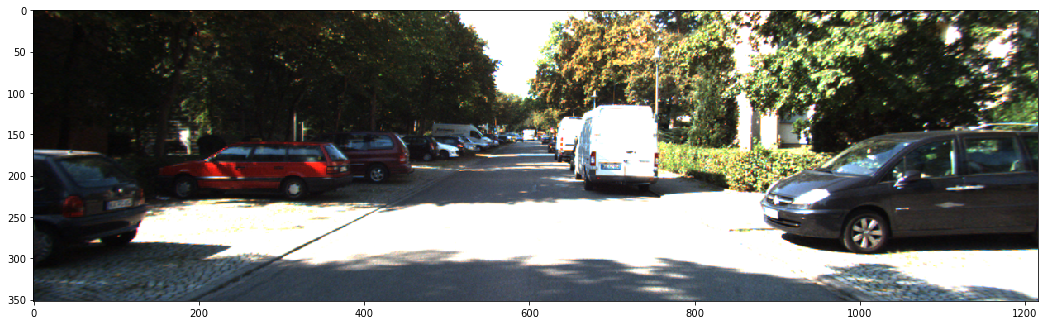

In [100]:
plt.figure(figsize=(18, 20))
plt.imshow(xb[1].permute(1, 2, 0), interpolation='nearest')

## Ground truth depth map from KITTI

Note that the ground truth depth map is comprised of mostly invalid pixels represented by block purple colouring. This arises from limitations in the LIDAR depth collection equipment. On the right, the black people carrier is just about visible and on the left the outline of the black car can be seen. The outline of the white van just off centre and to the right can also be seen, as can the tree gap and the shadows on the road.

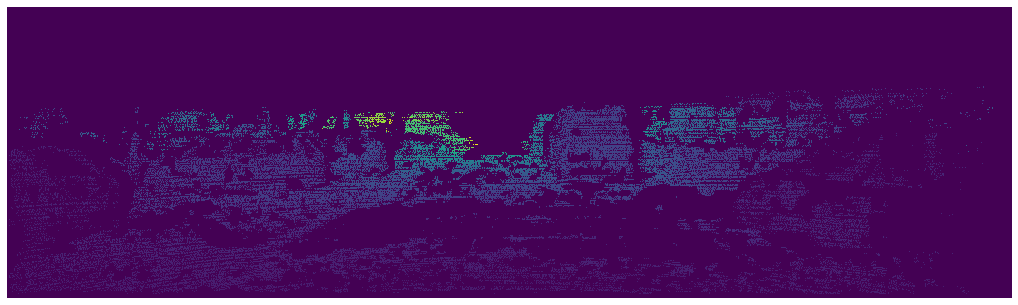

In [103]:
show_depth_image(reshaped_depth_gt)

## Predicted depth map from the SimpleCNN

Unlike the ground truth depth map, the predicted depth map contains few invalid pixels and more detail is retained from the original colour image.

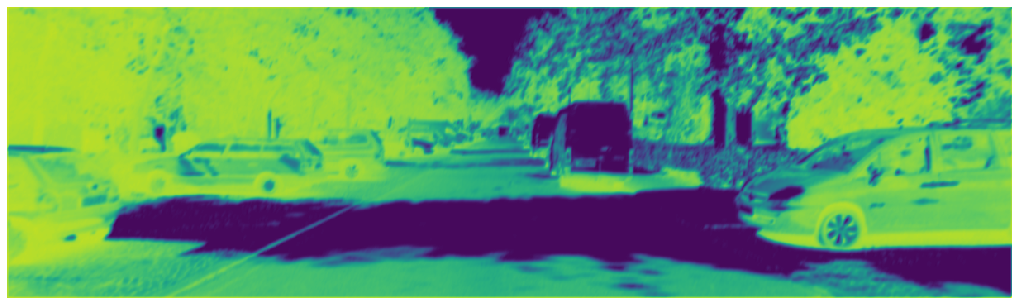

In [101]:
show_depth_image(reshaped_depth_pred)

# Comparisons

In [37]:
print("\033[4mValidation errors\n\033[0m")
for i, j, k in zip(val_means, list_of_errors, val_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))
print("\033[4m\nTest errors\n\033[0m")
for i, j, k in zip(test_means, list_of_errors, test_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))
print("\033[4m\nKitti errors\n\033[0m")
for i, j, k in zip(kitti_means, list_of_errors, kitti_stds):
    print(f"{j} \t\t", '{:.4g}'.format(i), "\t+-\t", '{:.4g}'.format(k))

Validation errors

standard difference 		 0.0206 	+-	 0.004148
square_difference 		 0.03379 	+-	 0.006241
inverse difference 		 6.702e+35 	+-	 1.05e+36
inverse squared 		 6.569e+36 	+-	 8.259e+36
logarithm difference 		 26.15 	+-	 11.87
log square difference 		 29.73 	+-	 11.63
scale invariant log 		 13.56 	+-	 3.61
absolute relavitve 		 1.19 	+-	 2.306
square relative 		 8.976e+04 	+-	 1.301e+06

Test errors

standard difference 		 0.02066 	+-	 0.004067
square_difference 		 0.03379 	+-	 0.006248
inverse difference 		 6.92e+35 	+-	 1.077e+36
inverse squared 		 6.728e+36 	+-	 8.363e+36
logarithm difference 		 27.11 	+-	 11.78
log square difference 		 30.73 	+-	 11.4
scale invariant log 		 13.84 	+-	 3.415
absolute relavitve 		 1.044 	+-	 1.213
square relative 		 4210 	+-	 4.6e+04

Kitti errors

standard difference 		 3677 	+-	 580.3
square_difference 		 4553 	+-	 763.4
inverse difference 		 2.292 	+-	 0.2089
inverse squared 		 2.296 	+-	 0.2095
logarithm difference 		 8.255 	+-	 0.7409


## Comparing the validation errors to the test errors

Motivation for calculating average errors with standard deviations on entire datasets was to allow for the conduction of hypothesis testing to a given significance interval.

To progress this further, there are several relationships that are needed.

- Conversion between in game depth and real world depth in metres
- Minimum and maximum depth ranges in game
- Conversion between KITTI depth data and real world depth data
- Minimum and maximum depth ranges of KITTI data

With these relationships, the calculate derrors can be transformed into SI units and then can be directly compared. Metrics, as they currently stand are in non standard and non consistent units and scalings so direct comparison of numbers cannot be conducted.

As such, no definitive statistical conclusions can be drawn from the calculated metrics. Although this is a shame, the procedure to calculate the metrics for any given dataset is complete and these relationships can be included at a later date to allow for thorough comparison.

With this error analysis, the goal was to compare the nine error metrics against a handful of top of the range depth prediction models published in literature to gauge how well our models compare.

# Conclusions

To draw any conclusions from the data produced and the models built, more understanding of the relationships between the generated data and the real world and kitti data are needed.

To make sense of the error metrics calculated, it is necessary to understand the formulae they are derived from. In order to quote and compare an error metric, it must be justified why that metric is being calculated and what it physically relates to and is comparing.

For example, let us look at the logarithm difference error. This error is calculated by finding the difference between the logarithm of the pixelwise depth values in predicted and ground truth depth. Mathematically this is expressed as the following:

$ {l_d} = \sum_{i}^n log(d_{pd})_i - log(d_{gt})_i $

where $i$ represents the $i^{th}$ pixel position being compared in the predicted and ground truth images, $n$ is the number of pixels to be compared and $ d_{pd}_i $ and $ d_{gt}_i $ are the depths at position $i$ in the predicted and ground truth images.

It could be reasoned that this metric is useful to calculate because large differences between predicted and ground truth depth are less heavily weighted than smaller differences due to the nature of a logarithmic mapping. This would be useful in eliminating the effect of high noise in the differences. In other words, not taking the logarithm of the differences exposes the metric to skewing for few very large difference pixel depth differences. The logatithm is acting as a low pass filter, reducing the effect of these infrequent, but impactful, large discrepencies: high frequency noise to continue the analogy.

As well as dicussing the motivation for the metrics, it is necessary to understand the limitations of the metrics. For the logarithmic difference, again, the metric can give a similar result in two scenarios. Predictions that have a large number of low difference pixels and a low number of high difference pixels predictions could give a similar log difference error as predictions that have a low number of low difference pixels and a high number of high difference pixels. Therefore, the logarithmic difference error alone cannot distinguish between these two cases. Another error, perhaps one acting as a more abrupt low pass filter, could be used to determine which differences are the cause of the logarithmic difference error's value.

One the limitations are understood, one can determine an estimated range of values in which the given metric would lie for different depth predictions. What would the metric give if all zero depths were used as a prediction? What if all the maximum value? What does a large or small metric value indicate? Answers to questions like these would be able to give a more informed evaluation procedure and therefore understanding of the depth images produced.

Hypothesis testing can then be conduceted allowing for experimentation of model hyperparametes. One can change a given hyperparameter and then see directly its effect on a given metric. This would allow a client to tune their depth prediction model to thier own needs, be that the model showing sensitivity to nearby objects more so than to farther ones.

Understanding the metrics, therefore, is instrumental to fine tuning and assesing the performance of one model to another. This was one of the original goals of the project. There were set out, three models that were to be built and compared: SimpleCNN, a more complicated autoencoder network and a purely traditional computer vision model. Of these, only the SimpleCNN and the traditional models were built and of those, only the SimpleCNN model was evaluated against all testing and KITTI data.

# References